# **BEGINNER'S TUTORIAL ON SCIKIT-LEARN WITH EXPLORATORY DATA ANALYSIS**

In this tutorial, we will explore some common tasks that can be accomplished using scikit-learn, a popular machine learning package in Python. Scikit-learn is known for its simplicity and efficiency in handling various machine learning algorithms.

## **Learning Objectives**

By the end of this tutorial, you will have a good understanding of how to:

1. **Load and inspect datasets**
2. **Perform Exploratory Data Analysis (EDA)**
3. **Split datasets into training, validation, and test sets**
4. **Train different classification and regression models**
5. **Handle missing values in datasets**
6. **Evaluate model performance using various metrics**

### Package Installation & Importation

In [1]:
# Execute this cell to install the required packages (if not done already)
!pip install scikit-learn numpy pandas matplotlib seaborn scipy

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# **PART 1: CLASSIFICATION**

## **Dataset Setup**

**Note:** Make sure you have uploaded your breast cancer dataset CSV file (`data.csv`) to the same directory as this notebook.

### **1. Loading the Dataset**


In [3]:
# Load the breast cancer dataset from uploaded CSV file
data_file = "data.csv"
df = pd.read_csv(data_file)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

## **2. Exploratory Data Analysis (EDA)**

### **Dataset Overview**

In [5]:

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

print("Data Types Distribution:")
for dtype, count in df.dtypes.value_counts().items():
    print(f"  {dtype}: {count} columns")

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

print("\nUnique Values per Column:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique values")

Dataset Shape: 569 rows × 33 columns
Memory Usage: 0.17 MB

Data Types Distribution:
  float64: 31 columns
  int64: 1 columns
  object: 1 columns

Duplicate Rows: 0

Unique Values per Column:
  id: 569 unique values
  diagnosis: 2 unique values
  radius_mean: 456 unique values
  texture_mean: 479 unique values
  perimeter_mean: 522 unique values
  area_mean: 539 unique values
  smoothness_mean: 474 unique values
  compactness_mean: 537 unique values
  concavity_mean: 537 unique values
  concave points_mean: 542 unique values
  symmetry_mean: 432 unique values
  fractal_dimension_mean: 499 unique values
  radius_se: 540 unique values
  texture_se: 519 unique values
  perimeter_se: 533 unique values
  area_se: 528 unique values
  smoothness_se: 547 unique values
  compactness_se: 541 unique values
  concavity_se: 533 unique values
  concave points_se: 507 unique values
  symmetry_se: 498 unique values
  fractal_dimension_se: 545 unique values
  radius_worst: 457 unique values
  texture_w

### **Target Variable Analysis**

Target Distribution:
  B: 357 samples (62.7%)
  M: 212 samples (37.3%)


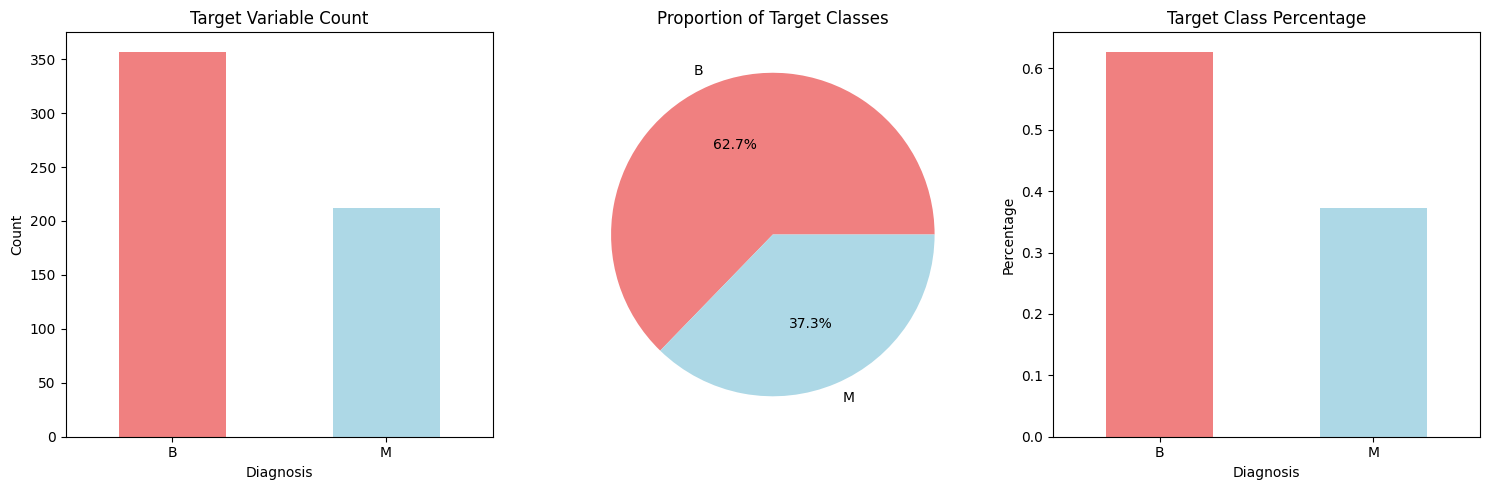

In [6]:
# Analyze target variable distribution
target_counts = df['diagnosis'].value_counts()
target_props = df['diagnosis'].value_counts(normalize=True)

print("Target Distribution:")
for value, count in target_counts.items():
    print(f"  {value}: {count} samples ({target_props[value]*100:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Count plot
target_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Target Variable Count')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=['lightcoral', 'lightblue'])
axes[1].set_title('Proportion of Target Classes')

# Percentage plot
target_props.plot(kind='bar', ax=axes[2], color=['lightcoral', 'lightblue'])
axes[2].set_title('Target Class Percentage')
axes[2].set_xlabel('Diagnosis')
axes[2].set_ylabel('Percentage')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### **Feature Distribution Analysis**

Total Numerical Features: 31

Descriptive Statistics for First 8 Features:
       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count      569.000       569.000         569.000    569.000          569.000   
mean        14.127        19.290          91.969    654.889            0.096   
std          3.524         4.301          24.299    351.914            0.014   
min          6.981         9.710          43.790    143.500            0.053   
25%         11.700        16.170          75.170    420.300            0.086   
50%         13.370        18.840          86.240    551.100            0.096   
75%         15.780        21.800         104.100    782.700            0.105   
max         28.110        39.280         188.500   2501.000            0.163   

       compactness_mean  concavity_mean  concave points_mean  
count           569.000         569.000              569.000  
mean              0.104           0.089                0.049  
std            

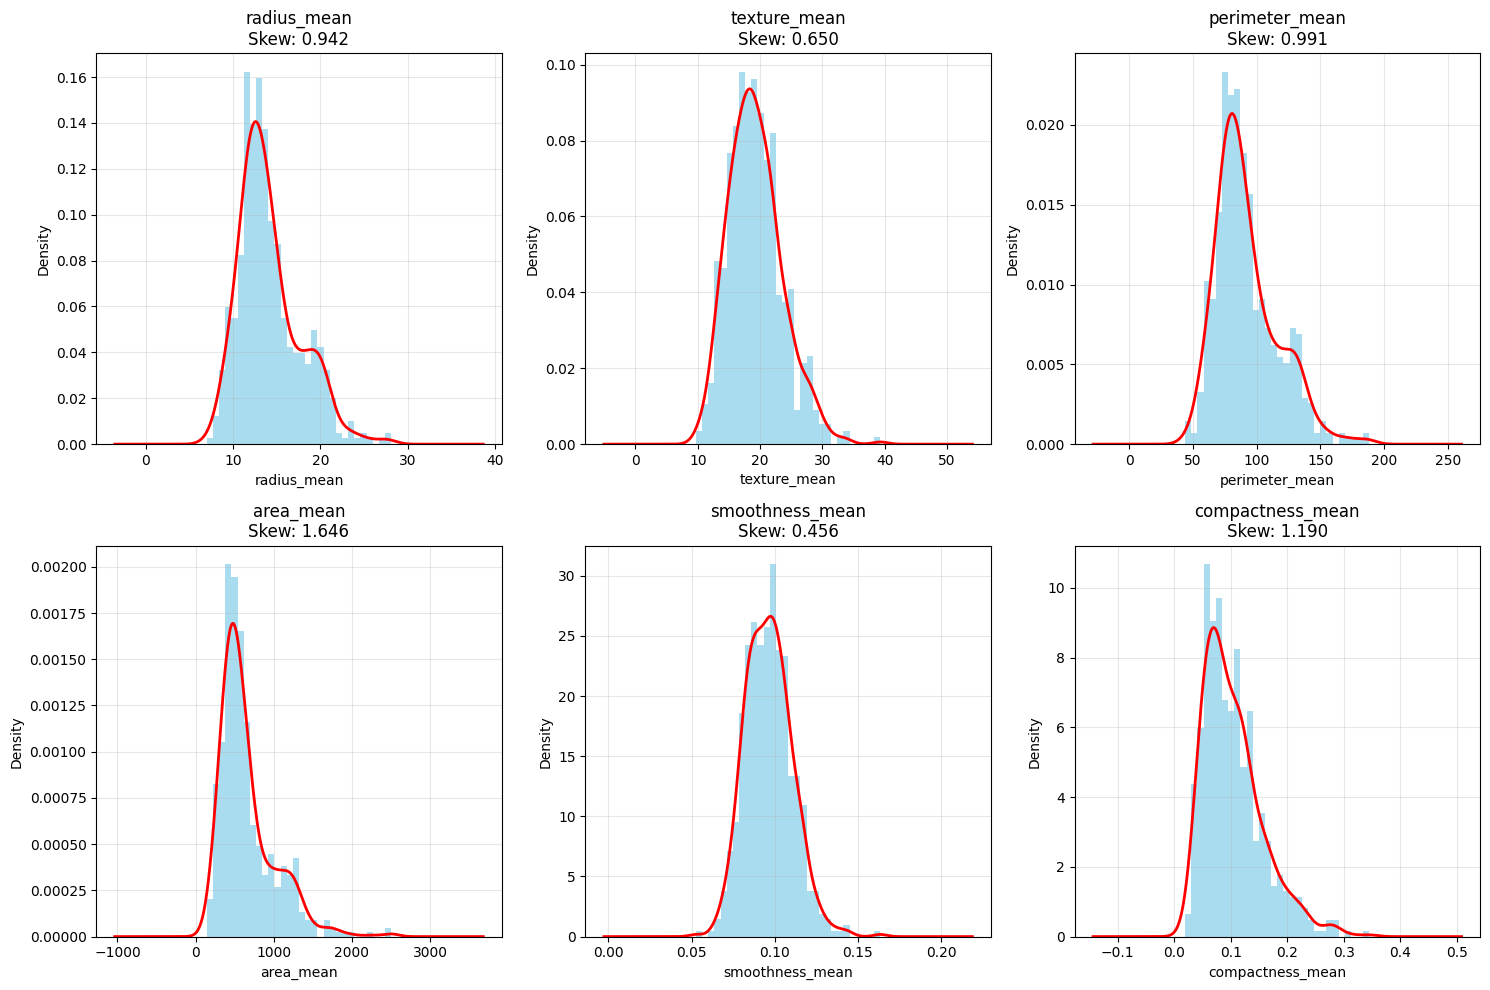

In [7]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

print(f"Total Numerical Features: {len(numerical_cols)}")
key_features = numerical_cols[:8]

print("\nDescriptive Statistics for First 8 Features:")
print(df[key_features].describe().round(3))

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(key_features[:6]):
    df[col].hist(bins=30, ax=axes[i], density=True, alpha=0.7, color='skyblue')
    try:
        df[col].plot.kde(ax=axes[i], color='red', linewidth=2)
    except:
        pass
    axes[i].set_title(f'{col}\nSkew: {df[col].skew():.3f}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **Correlation Analysis**

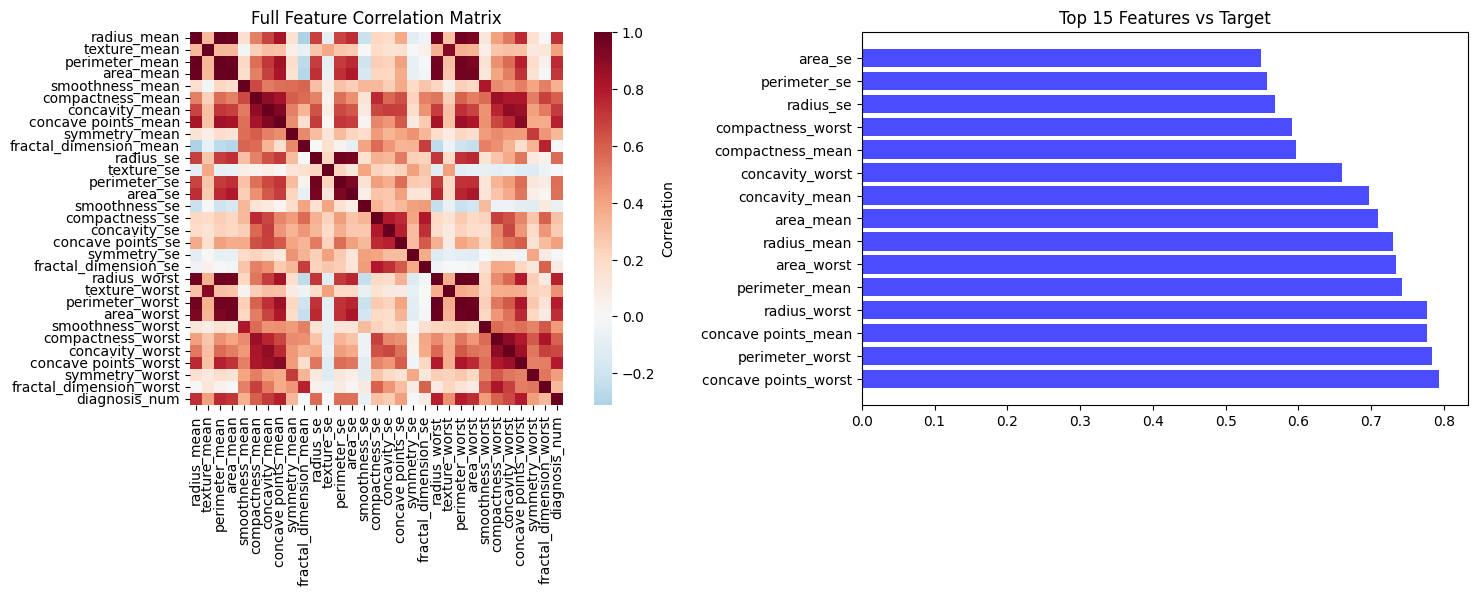


Top 5 Features Correlated with Diagnosis:
concave points_worst    0.794
perimeter_worst         0.783
concave points_mean     0.777
radius_worst            0.776
perimeter_mean          0.743
Name: diagnosis_num, dtype: float64


In [8]:
# Prepare data for correlation analysis
df_corr = df.drop(['Unnamed: 32', 'id'], axis=1, errors='ignore').copy()
df_corr['diagnosis_num'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

corr_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# Create correlation visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full correlation heatmap
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, square=True,
           ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Full Feature Correlation Matrix')

# Target correlation
target_corr = corr_matrix['diagnosis_num'].drop('diagnosis_num').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in target_corr.values]
axes[1].barh(range(len(target_corr[:15])), target_corr[:15].values, color=colors, alpha=0.7)
axes[1].set_yticks(range(len(target_corr[:15])))
axes[1].set_yticklabels(target_corr[:15].index)
axes[1].set_title('Top 15 Features vs Target')
axes[1].axvline(0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 5 Features Correlated with Diagnosis:")
print(target_corr[:5].round(3))

### **Missing Values Analysis**

In [9]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(f"Total missing values: {missing_values.sum()}")

Missing Values Analysis:
Unnamed: 32    569
dtype: int64
Total missing values: 569


In [10]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064   

## **3. Data Preprocessing and Splitting**

In [11]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 32', 'id']  # Update based on your dataset
df_clean = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

# Prepare features and target
X = df_clean.drop('diagnosis', axis=1)  # Features
y = df_clean['diagnosis']  # Target variable

# Convert target to binary
y = y.replace({'M': 1, 'B': 0})

print("Target variable distribution after encoding:")
print(y.value_counts())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Target variable distribution after encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64

Features shape: (569, 30)
Target shape: (569,)


In [12]:
# Split the data into training, validation, and test sets (70%, 10%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42, stratify=y_temp)

print("Data split sizes:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data split sizes:
Training set: 398 samples
Validation set: 58 samples
Test set: 113 samples


## **4. Training Classification Models**

### **Logistic Regression**

In [13]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


### **Decision Tree**

In [14]:
# Initialize and train Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


### **Support Vector Machine**

In [15]:
# Initialize and train SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
print("SVM model trained successfully!")

SVM model trained successfully!


## **5. Model Evaluation**

In [16]:
# Calculate performance metrics for all models
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree_clf,
    'SVM': svm_clf
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_val)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred)
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.round(4))

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9310        1.0  0.8182    0.9000
1        Decision Tree    0.8966        0.9  0.8182    0.8571
2                  SVM    0.9138        1.0  0.7727    0.8718


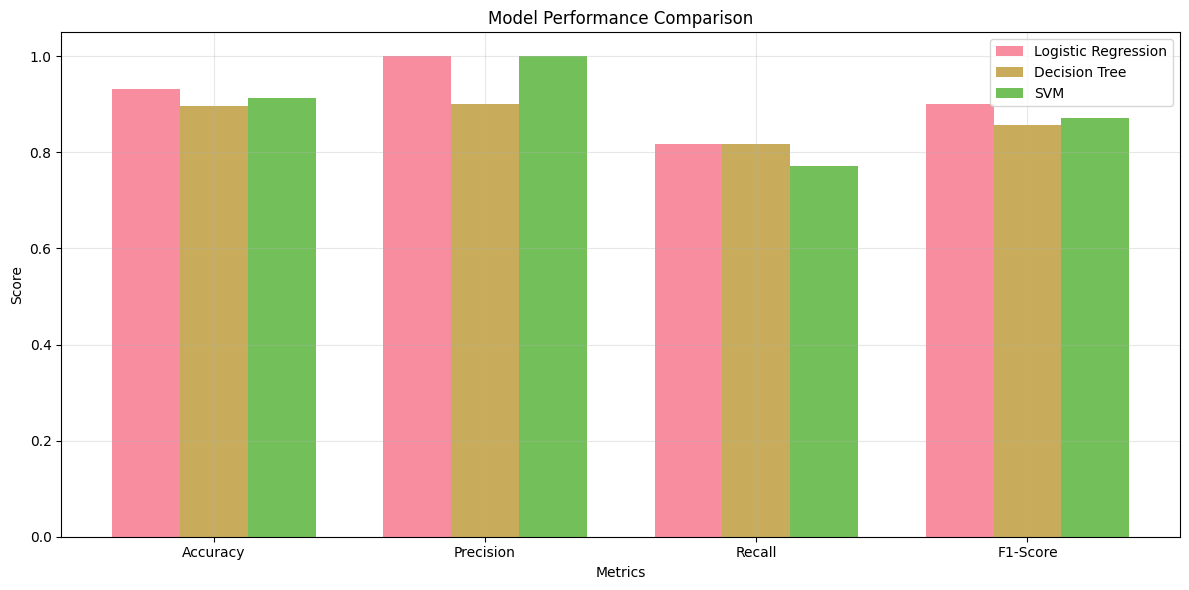

In [17]:
# Visualize model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

for i, (_, row) in enumerate(results_df.iterrows()):
    ax.bar(x + i*width, [row[metric] for metric in metrics],
           width, label=row['Model'], alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **PART 2: REGRESSION**

## **Dataset Setup**

**Note:** Make sure you have uploaded your `house_prices.zip` file to the same directory as this notebook.

In [18]:
import zipfile
import os

# Extract and load the house prices dataset
zip_file = "house_prices.zip"
extract_folder = "house_prices_extracted"

# Extract the zip file if not already extracted
if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
        print(f"Extracted {zip_file} to {extract_folder}/")

# Load the training dataset
train_file = os.path.join(extract_folder, "train.csv")
df_house = pd.read_csv(train_file)
print(f"Loaded dataset with shape: {df_house.shape}")
df_house.head()

Extracted house_prices.zip to house_prices_extracted/
Loaded dataset with shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **House Prices EDA**


Dataset Shape: 1460 rows × 81 columns
Memory Usage: 3.86 MB

Data Types Distribution:
  object: 43 columns
  int64: 35 columns
  float64: 3 columns

Missing Values: 7829 total
Duplicate Rows: 0
Target Variable Statistics:
Mean: $180,921.20
Median: $163,000.00
Standard Deviation: $79,442.50
Skewness: 1.883


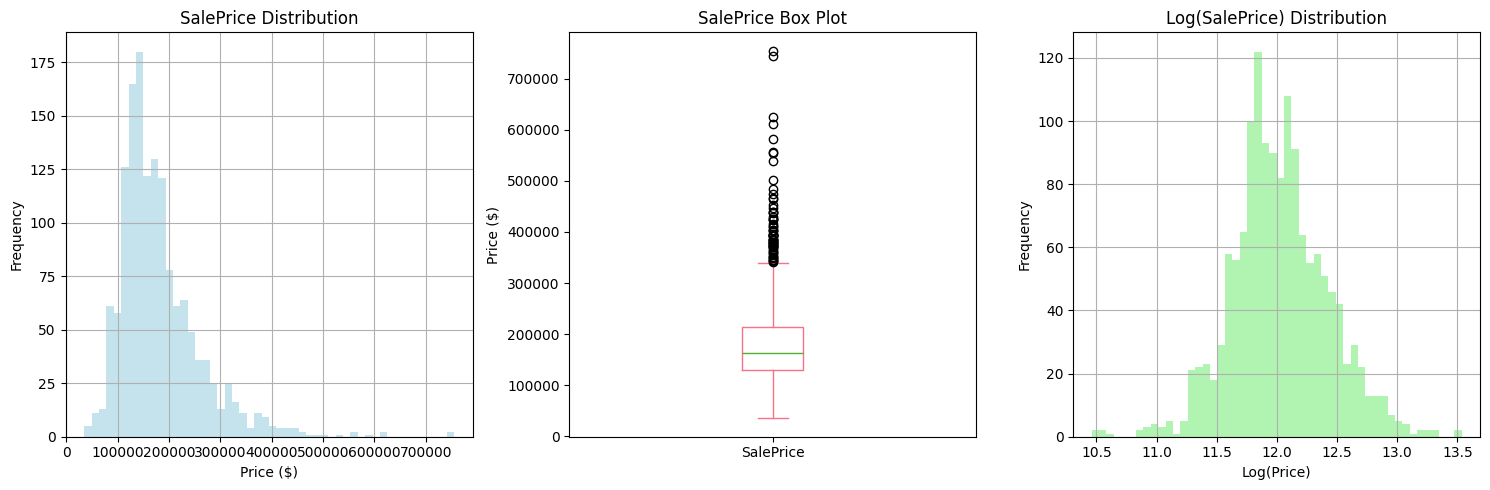

Analyzing features: ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', '1stFlrSF', '2ndFlrSF']


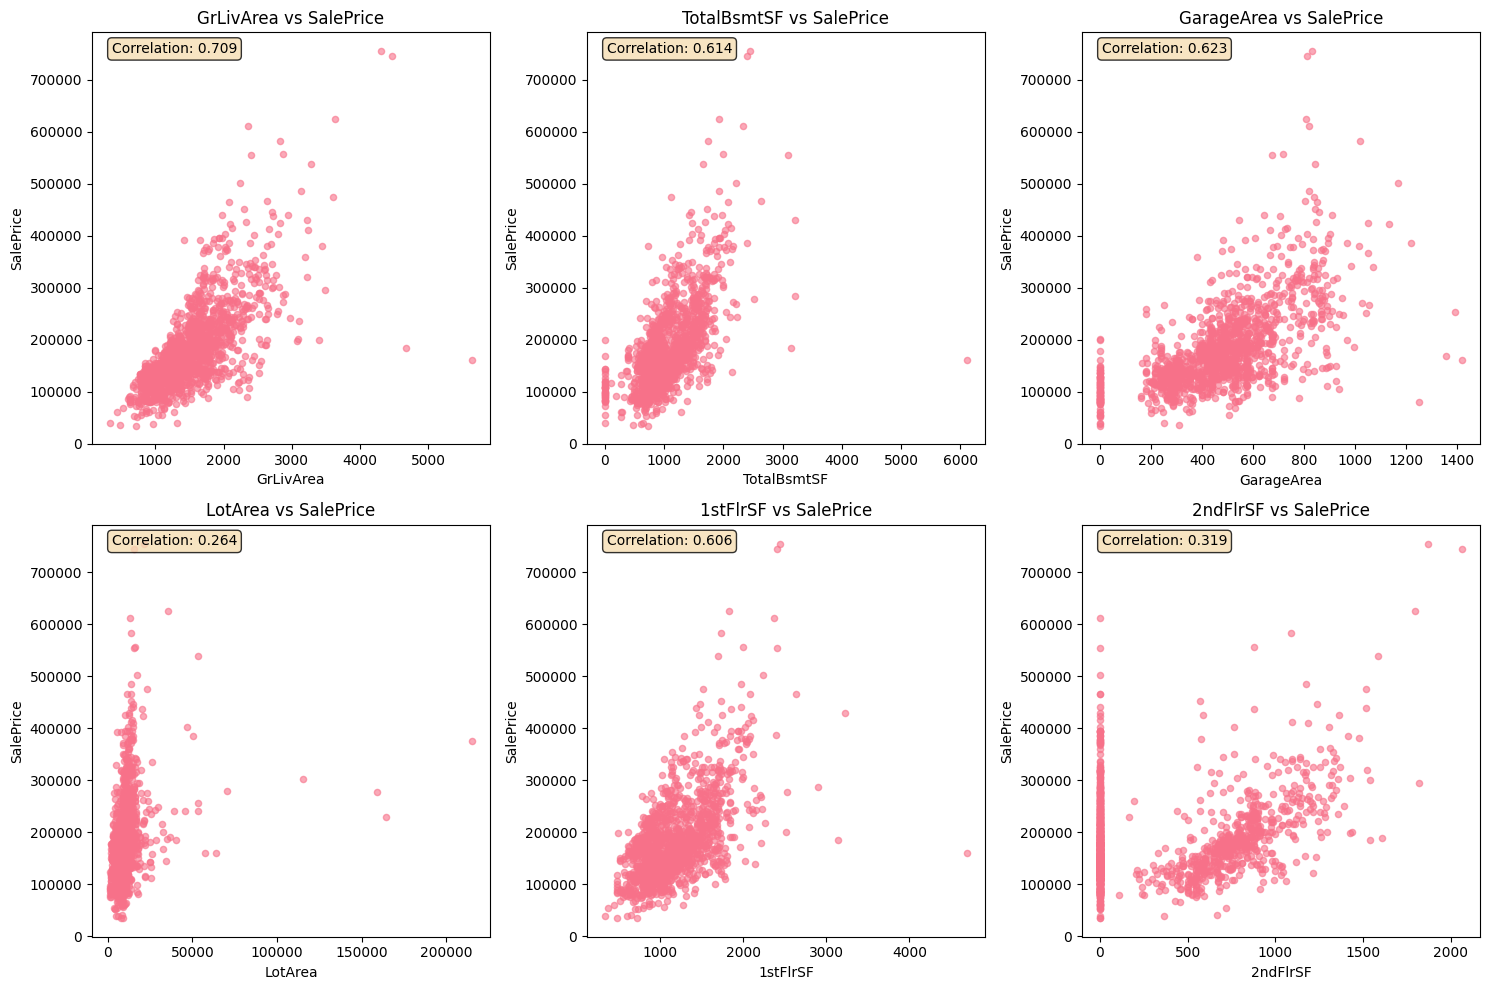

In [19]:

print(f"Dataset Shape: {df_house.shape[0]} rows × {df_house.shape[1]} columns")
print(f"Memory Usage: {df_house.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

print("Data Types Distribution:")
for dtype, count in df_house.dtypes.value_counts().items():
    print(f"  {dtype}: {count} columns")

print(f"\nMissing Values: {df_house.isnull().sum().sum()} total")
print(f"Duplicate Rows: {df_house.duplicated().sum()}")

target = 'SalePrice'

print(f"Target Variable Statistics:")
print(f"Mean: ${df_house[target].mean():,.2f}")
print(f"Median: ${df_house[target].median():,.2f}")
print(f"Standard Deviation: ${df_house[target].std():,.2f}")
print(f"Skewness: {df_house[target].skew():.3f}")

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram
df_house[target].hist(bins=50, ax=axes[0], alpha=0.7, color='lightblue')
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Box plot
df_house[target].plot.box(ax=axes[1])
axes[1].set_title('SalePrice Box Plot')
axes[1].set_ylabel('Price ($)')

# Log transformation
np.log(df_house[target]).hist(bins=50, ax=axes[2], alpha=0.7, color='lightgreen')
axes[2].set_title('Log(SalePrice) Distribution')
axes[2].set_xlabel('Log(Price)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analyze key numerical features
key_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', '1stFlrSF', '2ndFlrSF']
available_features = [col for col in key_features if col in df_house.columns]

print(f"Analyzing features: {available_features}")

# Create scatter plots with SalePrice
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(available_features):
    if i < len(axes):
        df_house.plot.scatter(x=feature, y=target, ax=axes[i], alpha=0.6)
        axes[i].set_title(f'{feature} vs {target}')

        # Calculate correlation
        corr = df_house[feature].corr(df_house[target])
        axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}',
                    transform=axes[i].transAxes,
                    bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

## **Data Preprocessing for Regression**

In [20]:
# Data cleaning and preprocessing
target = 'SalePrice'

# Drop rows with missing target values
df_house = df_house.dropna(subset=[target])
print(f"Removed rows with missing target values")

# Drop columns with too many missing values (>50%)
missing_threshold = 0.5
missing_pct = df_house.isnull().sum() / len(df_house)
cols_to_drop = missing_pct[missing_pct > missing_threshold].index
df_house = df_house.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >50% missing values")

print(f"Final dataset shape: {df_house.shape}")
print(f"Remaining missing values: {df_house.isnull().sum().sum()}")

Removed rows with missing target values
Dropped 5 columns with >50% missing values
Final dataset shape: (1460, 76)
Remaining missing values: 1550


In [21]:
# Prepare features and target
X_house = df_house.drop(columns=[target])
y_house = df_house[target]

# Select only numerical features for this example
numerical_features = X_house.select_dtypes(include=['int64', 'float64']).columns
X_house_num = X_house[numerical_features].fillna(X_house[numerical_features].median())

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Features shape: {X_house_num.shape}")
print(f"Target shape: {y_house.shape}")

Number of numerical features: 37
Features shape: (1460, 37)
Target shape: (1460,)


In [22]:
# Feature scaling
scaler = StandardScaler()
X_house_scaled = scaler.fit_transform(X_house_num)
print("Features scaled using StandardScaler")

Features scaled using StandardScaler


## **Model Training and Evaluation**

In [23]:
# Split the data
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_house.shape[0]} samples")
print(f"Test set: {X_test_house.shape[0]} samples")

Training set: 1168 samples
Test set: 292 samples


In [24]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_house, y_train_house)

# Make predictions
y_pred_house = lr_model.predict(X_test_house)

print("Linear Regression model trained successfully!")
print("\nFirst 10 predictions:")
for i in range(10):
    print(f"Actual: ${y_test_house.iloc[i]:,.2f}, Predicted: ${y_pred_house[i]:,.2f}")

Linear Regression model trained successfully!

First 10 predictions:
Actual: $154,500.00, Predicted: $153,728.36
Actual: $325,000.00, Predicted: $309,240.64
Actual: $115,000.00, Predicted: $112,897.29
Actual: $159,000.00, Predicted: $180,476.65
Actual: $315,500.00, Predicted: $294,934.41
Actual: $75,500.00, Predicted: $50,896.24
Actual: $311,500.00, Predicted: $233,798.04
Actual: $146,000.00, Predicted: $147,918.89
Actual: $84,500.00, Predicted: $48,537.33
Actual: $135,500.00, Predicted: $149,769.91


In [25]:
# Calculate performance metrics
mse = mean_squared_error(y_test_house, y_pred_house)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_house, y_pred_house)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error: ${np.mean(np.abs(y_test_house - y_pred_house)):,.2f}")

Model Performance Metrics:
Mean Squared Error (MSE): 1,360,121,073.22
Root Mean Squared Error (RMSE): $36,879.82
R-squared (R²): 0.8227
Mean Absolute Error: $23,000.03


### **Model Performance Visualization**

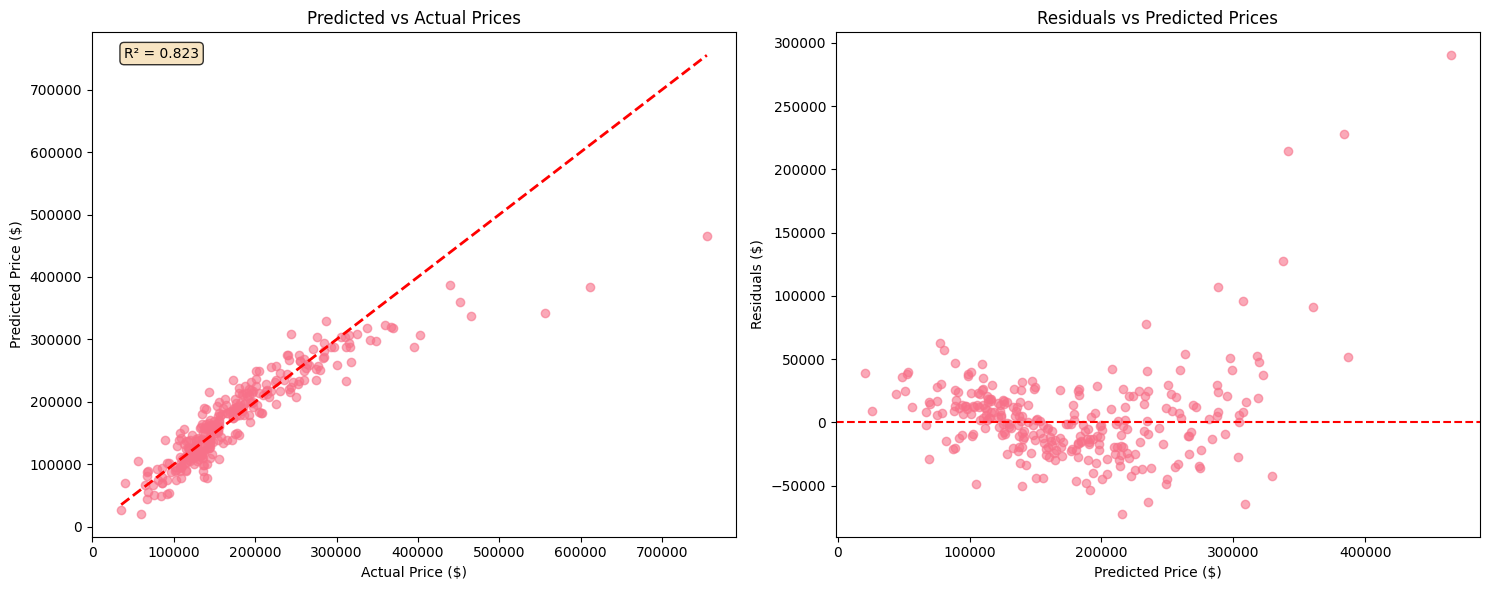

In [26]:
# Create prediction vs actual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Predicted vs Actual
axes[0].scatter(y_test_house, y_pred_house, alpha=0.6)
axes[0].plot([y_test_house.min(), y_test_house.max()],
            [y_test_house.min(), y_test_house.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title('Predicted vs Actual Prices')
axes[0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0].transAxes,
            bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Residuals plot
residuals = y_test_house - y_pred_house
axes[1].scatter(y_pred_house, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residuals vs Predicted Prices')

plt.tight_layout()
plt.show()

This tutorial covered the fundamentals of using scikit-learn for both classification and regression tasks, including proper data preprocessing, model training, and evaluation techniques.